<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/30_days_deep_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#数据准备
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers

In [5]:
!echo '{"username":"-","key":"-"}' > /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.09MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 47.6MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.7MB/s]


In [8]:
dftrain_raw = pd.read_csv('/content/train.csv')
dftest_raw = pd.read_csv('/content/test.csv')

In [9]:
dftrain_raw.head(10)  #数据显示

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
dftest_raw.head(10)  #数据显示

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Introduction of each field：

Survived: 0 for death and 1 for survived [y labels]

Pclass: Class of the tickets, with three possible values (1,2,3) [converting to one-hot encoding]

Name: Name of each passenger [discarded]

Sex: Gender of each passenger [converting to bool type]

Age: Age of each passenger (partly missing) [numerical feature, should add "Whether age is missing" as auxiliary feature]

SibSp: Number of siblings and spouse of each passenger (interger) [numerical feature]

Parch: Number of parents/children of each passenger (interger) [numerical feature]

Ticket: Ticket number (string) [discarded]

Fare: Ticket price of each passenger (float, between 0 to 500) [numerical feature]

Cabin: Cabin where each passenger is located (partly missing) [should add "Whether cabin is missing" as auxiliary feature]

Embarked: Which port was each passenger embarked, possible values are S、C、Q (partly missing) [converting to one-hot encoding, four dimensions, S,C,Q,nan]

Use data visualization in pandas library for initial EDA (Exploratory Data Analysis).

Survival label distribution:

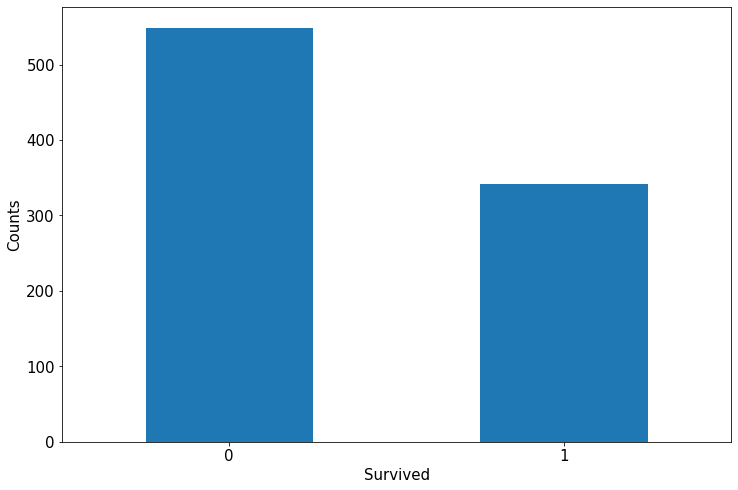

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar',figsize = (12,8),fontsize=15,rot=0) #Series.plot方法的函数（kind 可以是’line’, ‘bar’, ‘barh’, ‘kde’）
# rot旋转刻度标签(0-360)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Survived',fontsize = 15)
plt.show()

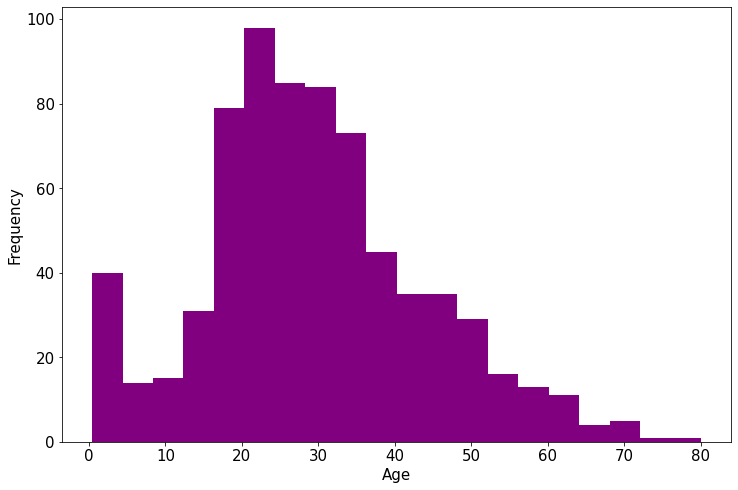

In [15]:
#Age distribution:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(kind = 'hist',bins = 20,color= 'purple',
                    figsize = (12,8),fontsize=15) #hist 直方图

ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

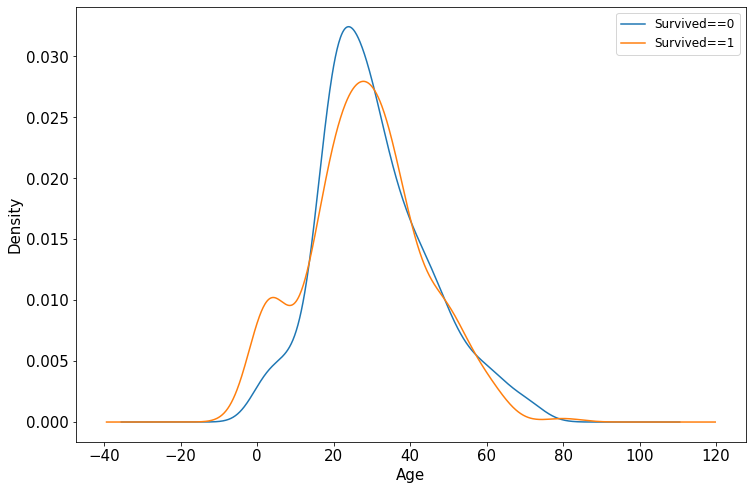

In [16]:
#Correlation between age and survival label:

%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
ax.legend(['Survived==0','Survived==1'],fontsize = 12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

In [19]:
# Below are code for formal data pre-processing:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
# y_test = dftest_raw['Survived'].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

x_train.shape = (891, 15)
x_test.shape = (418, 15)


In [20]:
# Model Definition
# Usually there are three ways of modeling using APIs of Keras: sequential modeling using Sequential() function, arbitrary modeling using functional API, and customized modeling by inheriting base class Model.

# Here we take the simplest way: sequential modeling using function Sequential().
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20,activation = 'relu',input_shape=(15,)))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


Model Training

There are three usual ways for model training: use internal function fit, use internal function train_on_batch, and customized training loop. Here we introduce the simplist way: using internal function fit.

In [21]:
# Use binary cross entropy loss function for binary classification
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['AUC'])

history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2 #Split part of the training data for validation
                   )

Epoch 1/30
12/12 [==============================] - 0s 27ms/step - loss: 1.7602 - auc: 0.4295 - val_loss: 0.8695 - val_auc: 0.4730
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 0.7878 - auc: 0.5899 - val_loss: 0.7193 - val_auc: 0.5942
Epoch 3/30
12/12 [==============================] - 0s 5ms/step - loss: 0.7718 - auc: 0.6264 - val_loss: 0.6624 - val_auc: 0.6090
Epoch 4/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6836 - auc: 0.6067 - val_loss: 0.6825 - val_auc: 0.5201
Epoch 5/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6511 - auc: 0.6255 - val_loss: 0.5943 - val_auc: 0.6981
Epoch 6/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6171 - auc: 0.6861 - val_loss: 0.5761 - val_auc: 0.7282
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6015 - auc: 0.7130 - val_loss: 0.5631 - val_auc: 0.7728
Epoch 8/30
12/12 [==============================] - 0s 5ms/step - loss: 0.5919 - auc: 0.7

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

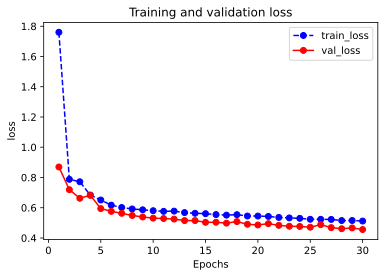

In [23]:
plot_metric(history,"loss")

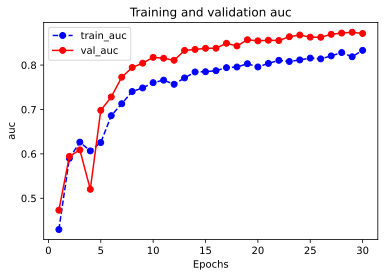

In [25]:
plot_metric(history,"auc") # Area Under ROC Curve

In [28]:
#
#5. Model Application
model.predict(x_test[0:20])


array([[0.20980327],
       [0.25375798],
       [0.17344855],
       [0.20132995],
       [0.46094525],
       [0.23704015],
       [0.42217225],
       [0.4450659 ],
       [0.4652887 ],
       [0.27670148],
       [0.25539494],
       [0.33184823],
       [0.80725974],
       [0.22686738],
       [0.7912635 ],
       [0.72763497],
       [0.38578096],
       [0.2062291 ],
       [0.4095848 ],
       [0.22201505]], dtype=float32)

In [29]:
model.predict_classes(x_test[0:20])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

The trained model could be saved through either the way of Keras or the way of original TensorFlow. The former only allows using Python to retrieve the model, while the latter allows cross-platform deployment.

The latter way is recommended to save the model.

In [31]:
# Model Saving
model.save('/content/keras_model.h5')  

In [32]:
del model  #Deleting current model

In [33]:
# Identical to the previous one
model = models.load_model('/content/keras_model.h5')
model.predict_classes(x_test[0:20])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [34]:
# Saving the model structure
json_str = model.to_json()

# Retrieving the model structure
model_json = models.model_from_json(json_str)

In [35]:
# Saving the weights of the model
model.save_weights('/content/keras_model_weight.h5')
# Retrieving the model structure
model_json = models.model_from_json(json_str)
model_json.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['AUC']
    )

# Load the weights
model_json.load_weights('/content/keras_model_weight.h5')
model_json.predict_classes(x_test[0:20])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [36]:
# (2) Model Saving with Original Way of TensorFlow

# Saving the weights, this way only save the tensors of the weights
model.save_weights('/content/tf_model_weights.ckpt',save_format = "tf")

In [37]:
# Saving model structure and parameters to a file, so the model allows cross-platform deployment

model.save('/content/tf_model_savedmodel', save_format="tf")
print('export saved model.')

model_loaded = tf.keras.models.load_model('/content/tf_model_savedmodel')
model_loaded.predict_classes(x_test[0:20])

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/tf_model_savedmodel/assets
export saved model.


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)